In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#load the dataset
df = pd.read_csv('C:\\IICET\\Recommendation_System\\fashion_products.csv')
df.head(10)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


In [2]:
#performing Exploratory Data Analysis
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [3]:
df.isnull()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [5]:
df['Product ID'].unique()
df.shape

(1000, 9)

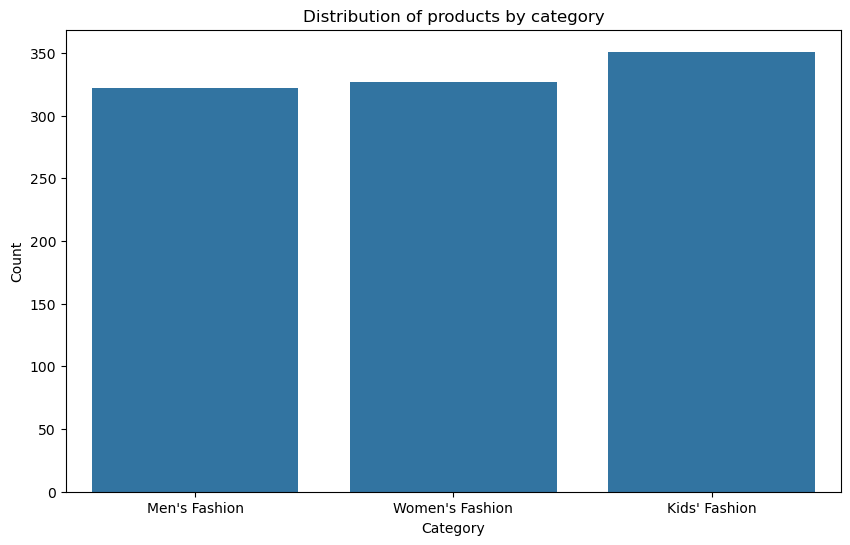

In [6]:
#Data Visualisation through plotting graphs and heatmap
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Category')
plt.title('Distribution of products by category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

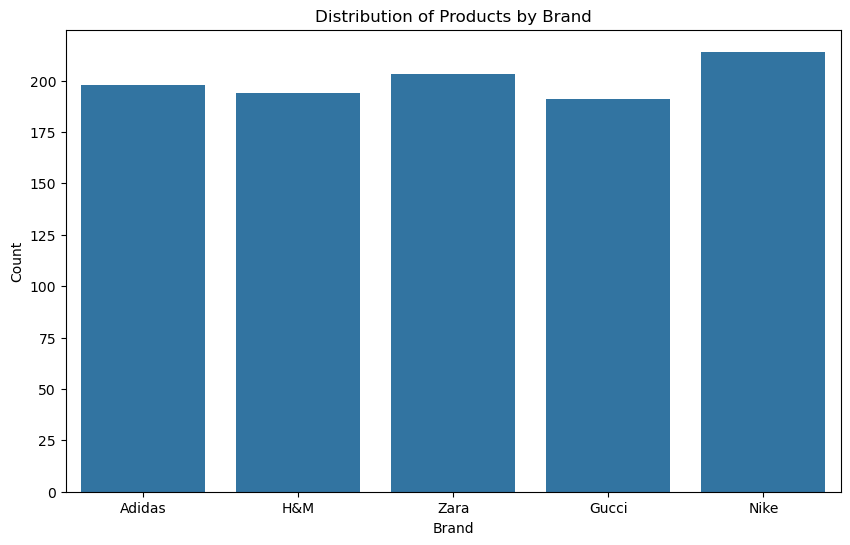

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Brand')
plt.title('Distribution of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

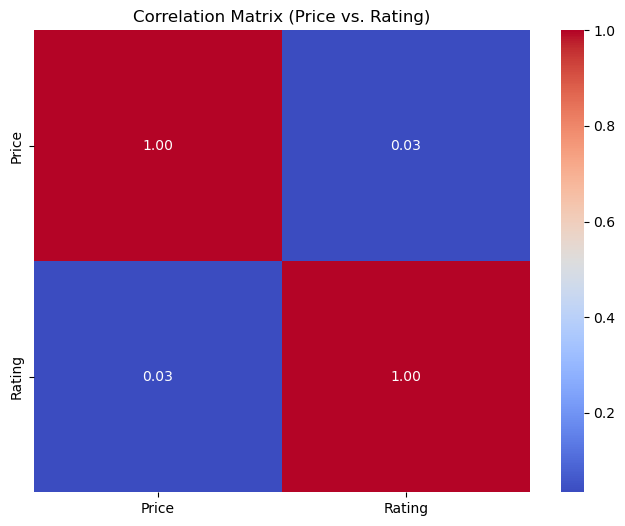

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price','Rating']].corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Price vs. Rating)')
plt.show()

In [9]:
#Evaluating top selling products
top_products = df['Product Name'].value_counts().head()
print("Top Selling Products:\n",top_products)

Top Selling Products:
 Product Name
Jeans      231
Shoes      222
T-shirt    201
Dress      176
Sweater    170
Name: count, dtype: int64


In [10]:
#finding average highest rating by colour
average_rates = df.groupby('Color')['Rating'].mean().sort_values(ascending=False)
print(average_rates)

Color
Green     3.060862
Yellow    3.051663
White     3.031189
Blue      2.976712
Black     2.916522
Red       2.902942
Name: Rating, dtype: float64


In [11]:
#sorting dataframe by color/rating
cat_dtype = pd.CategoricalDtype(categories=average_rates.index)
df['Color'] = df['Color'].astype(cat_dtype)
sorted_df = df.sort_values(by=['Color','Rating'], ascending=[True, False])
sorted_df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
703,6,704,T-shirt,Adidas,Kids' Fashion,38,4.979678,Green,M
125,65,126,T-shirt,Nike,Kids' Fashion,55,4.851704,Green,M
412,18,413,Jeans,Zara,Women's Fashion,21,4.849343,Green,XL
780,83,781,Sweater,Nike,Men's Fashion,85,4.828403,Green,L
532,12,533,Shoes,Nike,Kids' Fashion,11,4.825169,Green,S


In [12]:
#recommending by RATING AND COLOR
top_color_by_rating = sorted_df.drop_duplicates(subset='Color')
print('Top Product IDs by Color & Rating: ', top_color_by_rating['Product ID'].tolist())
top_color_by_rating

Top Product IDs by Color & Rating:  [704, 29, 579, 502, 199, 991]


,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
703,6,704,T-shirt,Adidas,Kids' Fashion,38,4.979678,Green,M
28,98,29,Shoes,Gucci,Women's Fashion,85,4.940985,Yellow,M
578,26,579,Shoes,Gucci,Women's Fashion,57,4.985950,White,XL
501,61,502,Dress,Zara,Kids' Fashion,33,4.987964,Blue,M
198,39,199,T-shirt,Zara,Women's Fashion,15,4.980656,Black,M
990,60,991,Shoes,Nike,Kids' Fashion,25,4.972677,Red,L


In [13]:
#recommending by RATING
rating = df.sort_values(by='Rating', ascending=False)
print('Top 5 Product IDs by Rating: ', rating['Product ID'].head(5).tolist())
rating

Top 5 Product IDs by Rating:  [502, 418, 579, 199, 704]


,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
501,61,502,Dress,Zara,Kids' Fashion,33,4.987964,Blue,M
417,82,418,Jeans,Zara,Men's Fashion,34,4.986091,Blue,S
578,26,579,Shoes,Gucci,Women's Fashion,57,4.985950,White,XL
198,39,199,T-shirt,Zara,Women's Fashion,15,4.980656,Black,M
703,6,704,T-shirt,Adidas,Kids' Fashion,38,4.979678,Green,M
...,...,...,...,...,...,...,...,...,...
135,34,136,Shoes,Zara,Men's Fashion,45,1.017655,Blue,XL
35,18,36,Dress,H&M,Kids' Fashion,74,1.014996,Green,S
650,35,651,Shoes,Gucci,Men's Fashion,16,1.005087,Yellow,XL
559,31,560,Dress,Adidas,Women's Fashion,99,1.002064,Red,XL


In [14]:
#creating user defined function to find product name and brand with highest rating
def name_brand_finder(ex_name, ex_brand):
    sort_brand_product = rating.loc[(rating['Product Name'] == ex_name) & (rating['Brand'] == ex_brand)]
    print('Product ID of Best', ex_name, 'by', ex_brand, sort_brand_product['Product ID'][:1].tolist())

In [15]:
#BEST PRODUCT BY BRAND
product_names_unique = rating['Product Name'].unique()
brand_unique = rating['Brand'].unique()
for brand in brand_unique:
    for name in product_names_unique:
        name_brand_finder(name, brand)

Product ID of Best Dress by Zara [502]
Product ID of Best Jeans by Zara [418]
Product ID of Best Shoes by Zara [127]
Product ID of Best T-shirt by Zara [199]
Product ID of Best Sweater by Zara [37]
Product ID of Best Dress by Gucci [653]
Product ID of Best Jeans by Gucci [45]
Product ID of Best Shoes by Gucci [579]
Product ID of Best T-shirt by Gucci [642]
Product ID of Best Sweater by Gucci [888]
Product ID of Best Dress by Adidas [327]
Product ID of Best Jeans by Adidas [346]
Product ID of Best Shoes by Adidas [300]
Product ID of Best T-shirt by Adidas [704]
Product ID of Best Sweater by Adidas [638]
Product ID of Best Dress by H&M [700]
Product ID of Best Jeans by H&M [939]
Product ID of Best Shoes by H&M [181]
Product ID of Best T-shirt by H&M [980]
Product ID of Best Sweater by H&M [970]
Product ID of Best Dress by Nike [469]
Product ID of Best Jeans by Nike [957]
Product ID of Best Shoes by Nike [991]
Product ID of Best T-shirt by Nike [126]
Product ID of Best Sweater by Nike [78

In [16]:
#creating user defined function to find product name and category with highest rating
def name_cat_finder(ex_name, ex_category):
    sort_cat_product = rating.loc[(rating['Product Name'] == ex_name) & (rating['Category'] == ex_category)]
    print('Product ID of Best', ex_name, 'by', ex_category, sort_cat_product['Product ID'][:1].tolist())
    

In [17]:
#BEST PRODUCT BY BRAND
product_names_unique = rating['Product Name'].unique()
cat_unique = rating['Category'].unique()
for cat in cat_unique:
    for name in product_names_unique:
        name_cat_finder(name, cat)

Product ID of Best Dress by Kids' Fashion [502]
Product ID of Best Jeans by Kids' Fashion [966]
Product ID of Best Shoes by Kids' Fashion [991]
Product ID of Best T-shirt by Kids' Fashion [704]
Product ID of Best Sweater by Kids' Fashion [970]
Product ID of Best Dress by Men's Fashion [508]
Product ID of Best Jeans by Men's Fashion [418]
Product ID of Best Shoes by Men's Fashion [93]
Product ID of Best T-shirt by Men's Fashion [927]
Product ID of Best Sweater by Men's Fashion [638]
Product ID of Best Dress by Women's Fashion [469]
Product ID of Best Jeans by Women's Fashion [45]
Product ID of Best Shoes by Women's Fashion [579]
Product ID of Best T-shirt by Women's Fashion [199]
Product ID of Best Sweater by Women's Fashion [733]


In [18]:
#dataframe with prices sorted from high to low
price_sort = df.sort_values(by = 'Price', ascending = False)
print('Most Expensive Product IDs: ', price_sort['Product ID'][:5].tolist())
price_sort_brand = price_sort.drop_duplicates(subset = 'Brand')
print('Most Expensive Product IDs bt Brand: ', price_sort_brand['Product ID'][:5].tolist())
price_sort_brand

Most Expensive Product IDs:  [92, 938, 269, 712, 738]
Most Expensive Product IDs bt Brand:  [92, 938, 269, 869, 789]


,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
91,6,92,Jeans,Adidas,Men's Fashion,100,1.845071,White,M
937,30,938,T-shirt,Gucci,Kids' Fashion,100,3.217890,Blue,S
268,34,269,Shoes,H&M,Kids' Fashion,100,4.743391,Black,S
868,98,869,Jeans,Zara,Men's Fashion,100,1.839079,Black,XL
788,22,789,Jeans,Nike,Women's Fashion,99,2.514205,Yellow,XL


we'll perform the following steps:

1.Outlier Removal: We'll use statistical methods like Z-score or IQR to identify and remove outlier from the "Rating" column.

2.Feature Engineering: Convert categorical variables into numerical using techniques like one-hot encoding.

3.Model Training: We'll train a machine learning model to predict the taste (rating) of the customer.

4.Model Evaluation: Evaluate the model's performance using appropriate evaluation metrics.

In [19]:
#importing necessary libraries for above steps
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [20]:
#Step 1:Outlier Removal
#Lets use IQR method to remove outliers
Q1=df['Rating'].quantile(0.25)
Q3=df['Rating'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [21]:
#step 2: feature Engineering
#Define features and target
X = df.drop(columns=['Rating'])
y = df['Rating']

#Perform one-hot encoding for categorical variables
categorical_features = ['Brand','Category','Color','Size']
numeric_features = ['Price']
preprocessor = ColumnTransformer(
    transformers = [
        ('num',SimpleImputer(strategy='mean'),numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


MODEL TRAINING USING

RANDOM FOREST REGRESSION

In [22]:
#step 3: Model Training
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#define the model pipeline
model = Pipeline(steps=[('preprocessor',preprocessor),('Regressor',RandomForestRegressor(random_state=42))])

In [24]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Price']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Brand', 'Category', 'Color',
                                                   'Size'])])),
                ('Regressor', RandomForestRegressor(random_state=42))])

In [25]:
#step 4: model evaluation
#predict on the test set
y_pred = model.predict(X_test)

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ",mse)
print("R-squared: ",r2)

Mean Absolute Error:  1.133563632632012
Mean Squared Error:  1.7167820355163053
R-squared:  -0.19205893348872216


MODEL TRAINING USING 

K-NEAREST NEIGHBOUR ALGORITHM

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_features),
        ('cat', OneHotEncoder(),categorical_features)
    ]
)

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Rating'])
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

knn_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('knn',KNeighborsRegressor(n_neighbors=5))
])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Price']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Brand', 'Category', 'Color',
                                                   'Size'])])),
                ('knn', KNeighborsRegressor())])

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error: ",mse)
print("R2 Score: ",r2)
print("Mean Absolute Error: ",mae)

Mean Squared Error:  1.6718370657222383
R2 Score:  -0.16085109717053414
Mean Absolute Error:  1.0847005287732736


MODEL TRAINING USING

K-MEANS ALGORITHM

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [31]:
X = df[['Rating']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

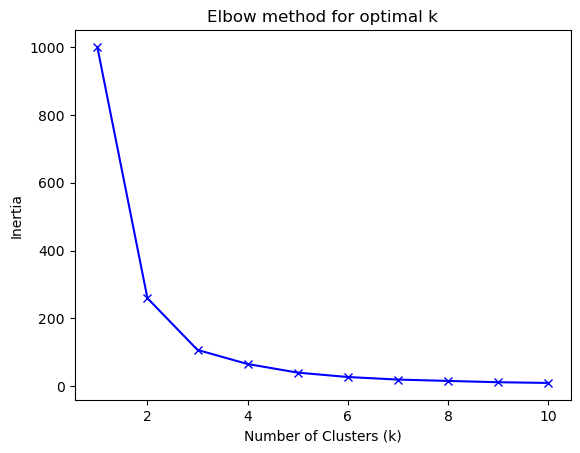

In [32]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

df['Cluster'] = labels

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error: ",mse)
print("R2 Score: ",r2)
print("Mean Absolute Error: ",mae)

Mean Squared Error:  1.6718370657222383
R2 Score:  -0.16085109717053414
Mean Absolute Error:  1.0847005287732736


MODEL TRAINING USING

SUPPORT VECTOR MACHINE (SVM)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X = df.drop(columns=['Rating'])
y = df['Rating']

# Define categorical and numerical columns
categorical_features = ['Brand', 'Category', 'Color', 'Size']
numeric_features = ['Price']

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [38]:
# Initialize and train the SVR model (for regression)
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(X_train_processed, y_train)

# Make predictions
y_pred = svr_regressor.predict(X_test_processed)

# Evaluate the model (regression metrics)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.4730360318205806
R-squared (R2): -0.022812287614843996
